In [1]:
cd ..

/home/thom/Documents/research/RandomBridge


In [2]:
import utils.PyRandomUtils as pru
from pdb import pm
import utils.CardUtils as cu
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(cu)
importlib.reload(pru)

<module 'utils.PyRandomUtils' from '/home/thom/Documents/research/RandomBridge/utils/PyRandomUtils.cpython-36m-x86_64-linux-gnu.so'>

In [3]:
batch_size = 32 #number of deals in a batch
num_batches = 1000

In [4]:
DECK = np.array(range(1,53), dtype=np.int8)
ts = cu.theoretical_probabilities
def shuffled(gen):
    return pru.deck(gen)

In [40]:
#bad prng
bad = pru.LCG(mod=2**16, a=5, seed=1, c=0)

#deterministic gen
halton = pru.HaltonGen(base=11)

#good prng
good = pru.PyRandGen(1)


In [52]:
def make_ts(gen, batches=num_batches, batch_size=batch_size):
    ts = [sum((cu.get_features(shuffled(gen)) for i in range(batch_size))) / batch_size
           for j in range(batches)]
    return np.array(ts).T

In [55]:

ts_bad = make_ts(bad, batches=4000, batch_size=32)

In [41]:
ts_halton = make_ts(halton)

In [9]:
ts_good = make_ts(good)

In [10]:
def make_graphs(ts): 
    dim = ts.shape[0]
    fig, ax = plt.subplots(dim,1, figsize = (15, 100))

    for i in range(dim):
        plt.subplot(dim,1,i+1)
        plt.title(cu.feature_string[i],fontsize=16)
        plt.plot(ts[i] - cu.theoretical_probabilities[i])

def print_means(ts):
    means = np.apply_along_axis(np.mean, 1, ts)
    tp = cu.theoretical_probabilities
    print("{:22}{:^22}{:^22}{:^22}".format("Feature", "p", "p_hat", "p-p_hat"))
    for i in range(len(cu.feature_string)):
        print("{:20} {: 20.18f} {: 20.18f} {: 20.18f}".format(cu.feature_string[i], 
                                           cu.theoretical_probabilities[i], 
                                           means[i], 
                                           cu.theoretical_probabilities[i]-means[i]))

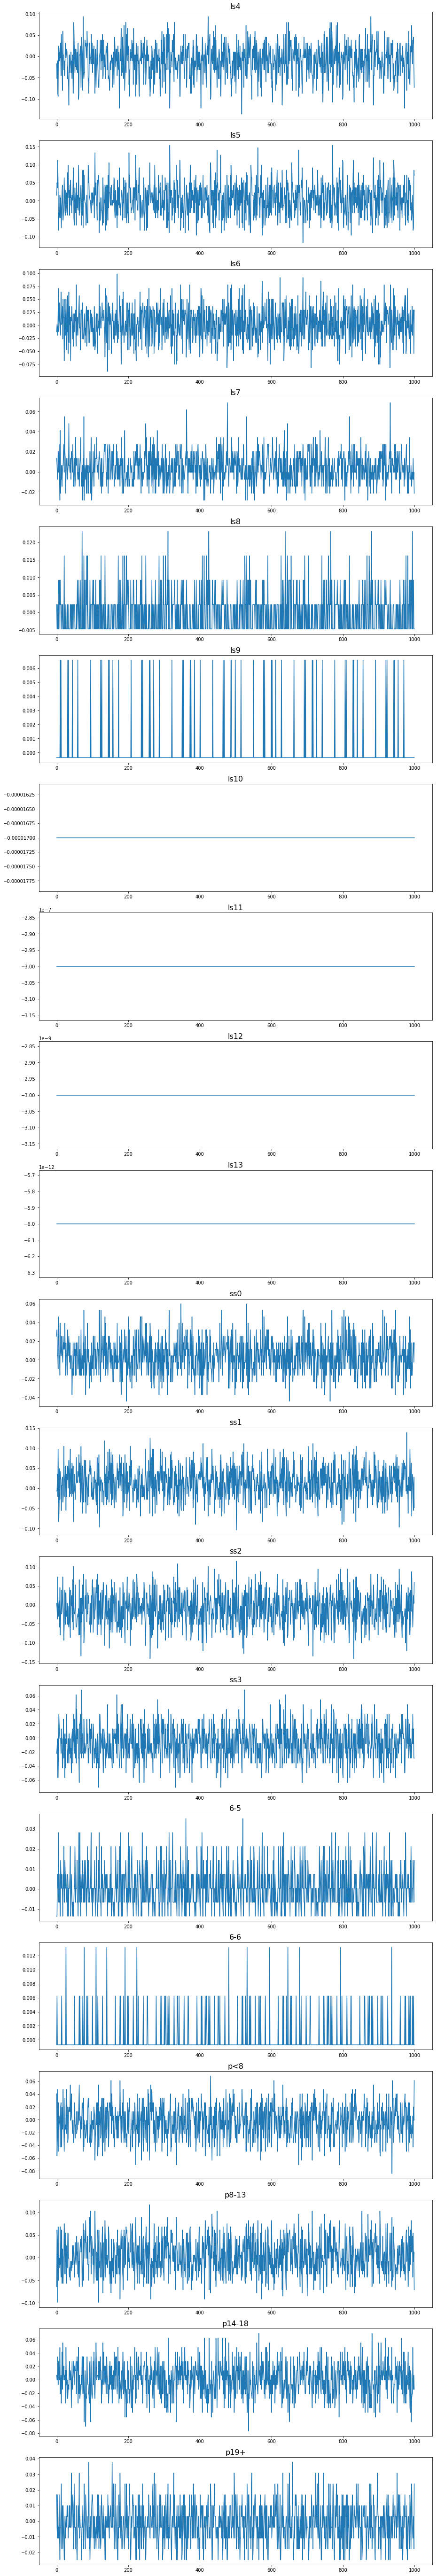

In [11]:
make_graphs(ts_bad)

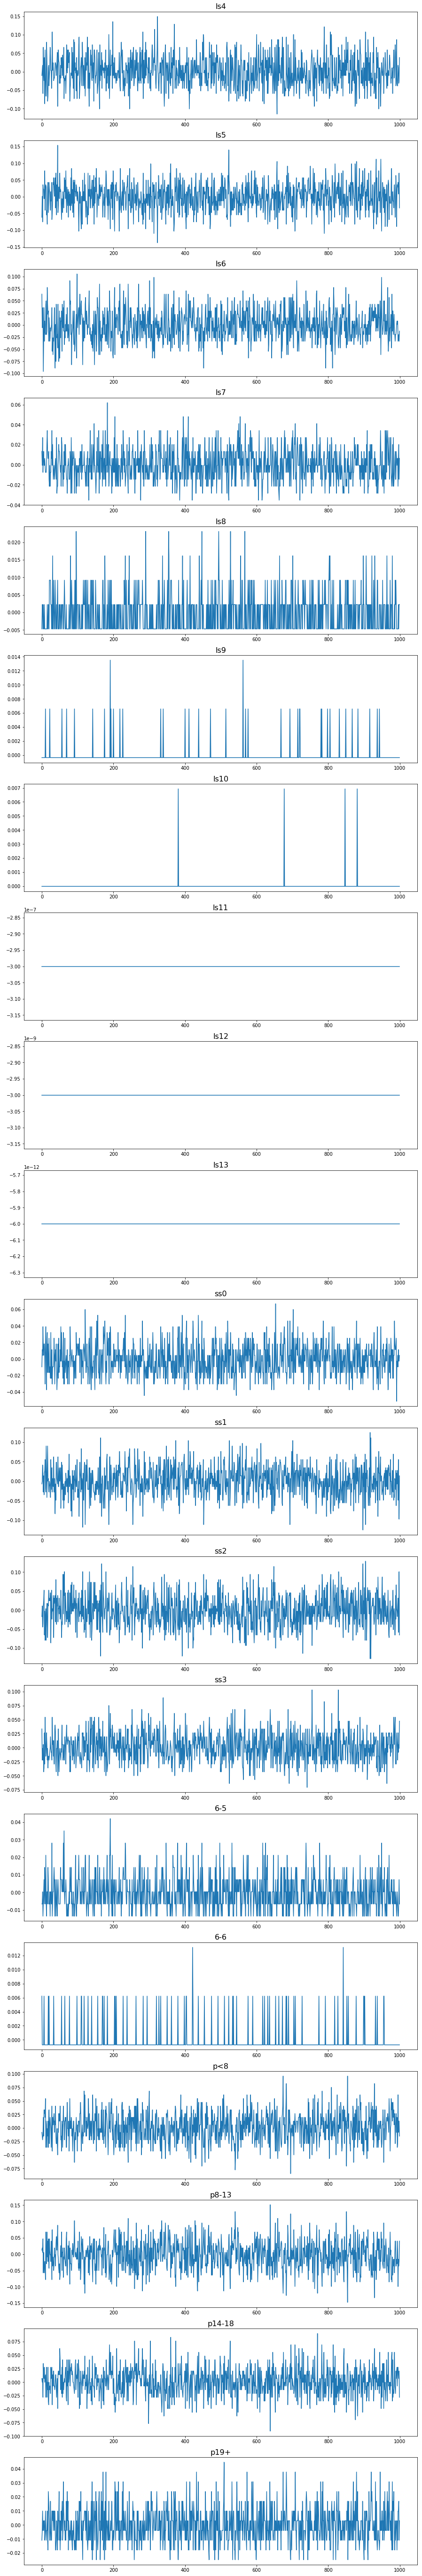

In [12]:
make_graphs(ts_good)

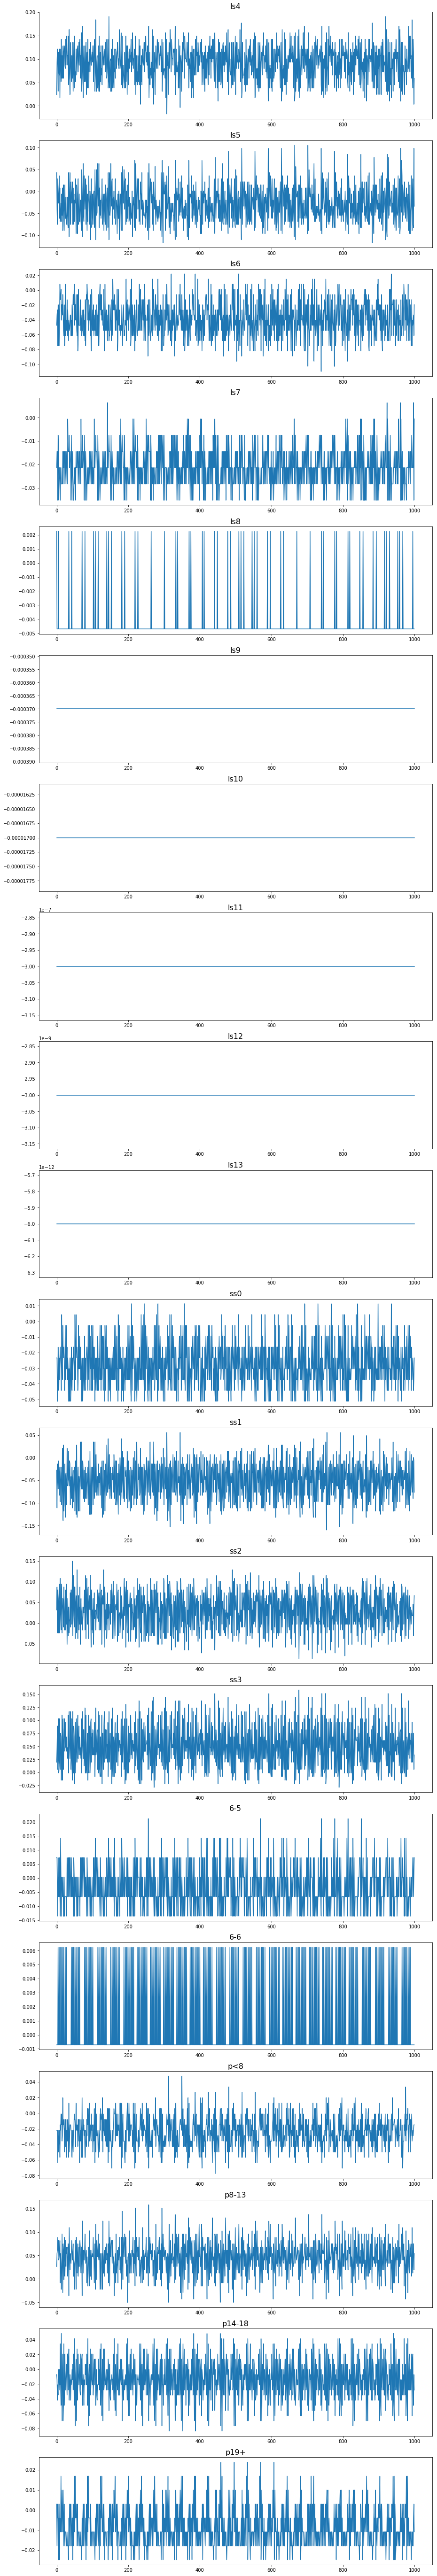

In [42]:
make_graphs(ts_halton)

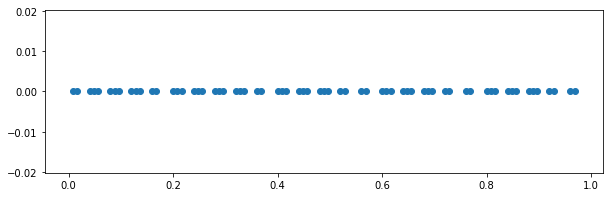

In [38]:
halton2 = pru.HaltonGen(base=5)

fig, ax = plt.subplots(figsize = (10, 3))
num = 66
y = [halton2.rand() for i in range(num)]
# plt.scatter(y, range(num))
plt.scatter(y, [0]*num)


In [45]:
print_means(ts_halton)

Feature                         p                   p_hat                p-p_hat        
ls4                   0.350800000000000001  0.442659722222222163 -0.091859722222222162
ls5                   0.443400000000000016  0.415291666666666615  0.028108333333333402
ls6                   0.165500000000000008  0.127284722222222230  0.038215277777777779
ls7                   0.035299999999999998  0.014368055555555558  0.020931944444444441
ls8                   0.004700000000000000  0.000395833333333333  0.004304166666666667
ls9                   0.000370000000000000  0.000000000000000000  0.000370000000000000
ls10                  0.000017000000000000  0.000000000000000000  0.000017000000000000
ls11                  0.000000300000000000  0.000000000000000000  0.000000300000000000
ls12                  0.000000003000000000  0.000000000000000000  0.000000003000000000
ls13                  0.000000000006000000  0.000000000000000000  0.000000000006000000
ss0                   0.05120000000000000

In [39]:
print_means(ts_good)

Feature                         p                   p_hat                p-p_hat        
ls4                   0.350800000000000001  0.351763888888888931 -0.000963888888888931
ls5                   0.443400000000000016  0.442631944444444481  0.000768055555555536
ls6                   0.165500000000000008  0.165284722222222236  0.000215277777777773
ls7                   0.035299999999999998  0.035472222222222217 -0.000172222222222219
ls8                   0.004700000000000000  0.004541666666666667  0.000158333333333333
ls9                   0.000370000000000000  0.000277777777777778  0.000092222222222222
ls10                  0.000017000000000000  0.000027777777777778 -0.000010777777777778
ls11                  0.000000300000000000  0.000000000000000000  0.000000300000000000
ls12                  0.000000003000000000  0.000000000000000000  0.000000003000000000
ls13                  0.000000000006000000  0.000000000000000000  0.000000000006000000
ss0                   0.05120000000000000